# <u> DATA SCIENCE PROJECT</u>:

## Predicting Business Survival Rate based on London Borough

### PART 3 - Modelling and Prediction

<ul><li>Section 1 - Regression Model, Prediction and Evaluation</li>
<li>Section 2 - Classification Model, Prediction and Evaluation</li></ul>

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score

Re-upload final data prepared from <b>01_Data Preparation.ipynb</b>

In [4]:
df = pd.read_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/FINAL_DATA/FINAL_MODEL_DATA.csv")
df.drop(['Unnamed: 0', 'Borough', 'Designation','year','Designation_num','Population','Borough_num'], axis=1, inplace=True)
df['survival_rate'] = 100 - df['death_rate']
df.shape

(66, 135)

Prepare variables for modelling:

In [5]:
#Preparing X variables
df_x = df.drop(['survival_rate','death_rate','survive'],axis=1)
X = np.asarray(df_x)
X = preprocessing.StandardScaler().fit(X).transform(X)

#Preparing Y variables
df_y = df['survival_rate']
Y = np.asarray(df_y)

#Split into train-test
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (59, 132) (59,)
Test set: (7, 132) (7,)


## Section 1 - Regression Model: Multiple Linear Regression

Prediction Model:

In [6]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train, Y_train)
y_hat= regr.predict(X_test)
# The coefficients
# print ('Coefficients: ', regr.coef_)

Evaluate Model:

In [8]:
from sklearn.metrics import mean_squared_error

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - Y_test) ** 2))


print("Mean squared error: %.2f"
      % regr.score(X,Y))

# Explained variance score: 1 is perfect prediction
print('Variance score, i.e. R-Square: %.5f' % regr.score(X, Y))

Residual sum of squares: 138.33
Mean squared error: 0.76
Variance score, i.e. R-Square: 0.75904


Visualise result: Predicted value by Actual value scatterplot</li>

In [36]:
import matplotlib.pyplot as plt

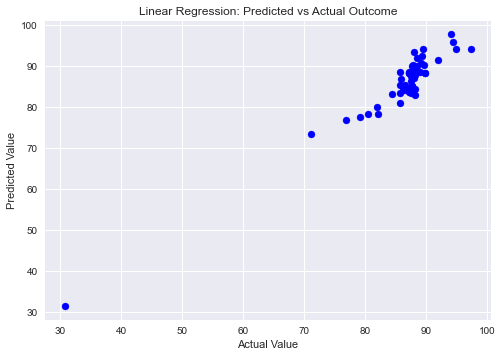

In [38]:
regr.fit (X, Y)
y_hat= regr.predict(X_train)
plt.style.use('seaborn')
plt.scatter(Y_train, y_hat,  color='blue')
plt.title("Linear Regression: Predicted vs Actual Outcome")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

## Section 2 - Classification Model: Logistic Regression

Variable Prepration & Prediction Model:

In [53]:
from sklearn.linear_model import LogisticRegression

#Preparing X variables
df_x_LR = df.drop(['survival_rate','death_rate','survive'],axis=1)
X_LR = np.asarray(df_x_LR)
X_LR = preprocessing.StandardScaler().fit(X_LR).transform(X_LR)

#Preparing Y variables
df_y_LR = df['survive']
Y_LR = np.asarray(df_y_LR)

#Due to limited data, it is not recommended to split by train and test
#Split into train-test
X_trainLR, X_testLR, Y_trainLR, Y_testLR = train_test_split( X_LR, Y_LR, test_size=0.3, random_state=4)
print ('Train set:', X_trainLR.shape,  Y_trainLR.shape)
print ('Test set:', X_testLR.shape,  Y_testLR.shape)


LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainLR,Y_trainLR)
yhatLR = LR.predict(X_testLR)
yhat_probLR = LR.predict_proba(X_testLR)

Train set: (46, 132) (46,)
Test set: (20, 132) (20,)


Evaluate Model:

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

print(confusion_matrix(Y_testLR, yhatLR, labels=[1,0]))
print(jaccard_score(Y_testLR, yhatLR,pos_label=0))
print(log_loss(Y_testLR, yhat_probLR))

[[7 8]
 [1 4]]
0.3076923076923077
0.6816840144632687


Visualise result: Creating a function to make grid graph of the Confusion Matrix

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                fontsize='xx-large')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_testLR, yhatLR, labels=[1,0]))

[[7 8]
 [1 4]]


Confusion matrix, without normalization
[[7 8]
 [1 4]]


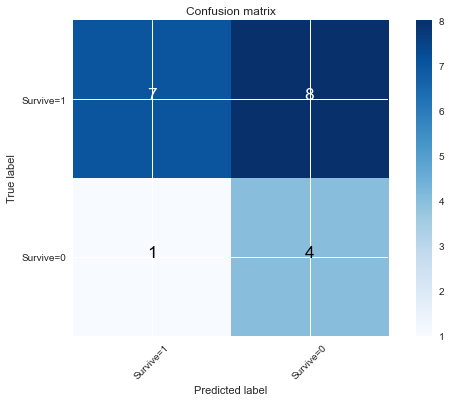

In [47]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_testLR, yhatLR,  labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survive=1','Survive=0'],normalize= False,  title='Confusion matrix')